## **AIE425 Intelligent Recommender Systems - Course Project**

### **Section 2: Part 1**

**By Hala Soliman (222102480)**


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import json
import sqlite3
import re


### Data Reading

In [3]:
#reading from data source 1
database = sqlite3.connect('database.sqlite')
categories = pd.read_sql_query("SELECT * FROM categories", database)
podcasts = pd.read_sql_query("SELECT * FROM podcasts", database)
reviews = pd.read_sql_query("SELECT * FROM reviews", database)

In [4]:
print(categories.head())

                         podcast_id              category
0  c61aa81c9b929a66f0c1db6cbe5d8548                  arts
1  c61aa81c9b929a66f0c1db6cbe5d8548  arts-performing-arts
2  c61aa81c9b929a66f0c1db6cbe5d8548                 music
3  ad4f2bf69c72b8db75978423c25f379e                  arts
4  ad4f2bf69c72b8db75978423c25f379e           arts-design


In [5]:
print(podcasts.head())

                         podcast_id   itunes_id  \
0  a00018b54eb342567c94dacfb2a3e504  1313466221   
1  a00043d34e734b09246d17dc5d56f63c   158973461   
2  a0004b1ef445af9dc84dad1e7821b1e3   139076942   
3  a00071f9aaae9ac725c3a586701abf4d  1332508972   
4  a000a500f06555f81220c3eb641aded7  1544900779   

                                    slug  \
0                         scaling-global   
1  cornerstone-baptist-church-of-orlando   
2            mystery-dancing-in-the-dark   
3                      kts-money-matters   
4       word-on-the-street-w-dreak-swift   

                                          itunes_url  \
0  https://podcasts.apple.com/us/podcast/scaling-...   
1  https://podcasts.apple.com/us/podcast/cornerst...   
2  https://podcasts.apple.com/us/podcast/mystery-...   
3  https://podcasts.apple.com/us/podcast/kts-mone...   
4  https://podcasts.apple.com/us/podcast/word-on-...   

                                   title  
0                         Scaling Global  
1  Co

In [6]:
print(reviews.head())

                         podcast_id  \
0  c61aa81c9b929a66f0c1db6cbe5d8548   
1  c61aa81c9b929a66f0c1db6cbe5d8548   
2  ad4f2bf69c72b8db75978423c25f379e   
3  ad4f2bf69c72b8db75978423c25f379e   
4  ad4f2bf69c72b8db75978423c25f379e   

                                              title  \
0                               really interesting!   
1  Must listen for anyone interested in the arts!!!   
2                                 nauseatingly left   
3                                   Diverse stories   
4                                              👍👍👍👍   

                                             content  rating        author_id  \
0  Thanks for providing these insights.  Really e...       5  F7E5A318989779D   
1  Super excited to see this podcast grow. So man...       5  F6BF5472689BD12   
2  I'm a liberal myself, but its pretty obvious a...       1  1AB95B8E6E1309E   
3  I find Tedx talks very inspirational but I oft...       5  11BB760AA5DEBD1   
4                I love this 

### Data Merging

In [7]:
#we combined the reviews and data about podcasts based on the podcast_id
data = pd.merge(reviews, podcasts, on='podcast_id', how='left')
data = pd.merge(data, categories, on='podcast_id', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553715 entries, 0 to 4553714
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   podcast_id  object 
 1   title_x     object 
 2   content     object 
 3   rating      int64  
 4   author_id   object 
 5   created_at  object 
 6   itunes_id   float64
 7   slug        object 
 8   itunes_url  object 
 9   title_y     object 
 10  category    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 382.2+ MB


In [8]:
#reading from data source 2

podcasts_list = []
with open('podcasts.json', 'r', encoding='utf-8') as f:
    for line in f:
        podcasts_list.append(json.loads(line))
podcasts_json = pd.DataFrame(podcasts_list)
print(podcasts_json.head())

                         podcast_id   itunes_id  \
0  d3997f1089be9e45fda4113be39765cb  1000000618   
1  f201172864310534ae6b6c4f8ae9b8cc  1000016089   
2  4e5ce6a47e5d491aac3f588cfb3ece73  1000016800   
3  6c476d3dd90c3fe5381153354b326952  1000035657   
4  b9e7fdf5cd545fc8097055e2f2f1d760  1000035702   

                                  slug  \
0   christianity-questions-and-answers   
1                  rahdo-talks-through   
2  st-neots-evangelical-church-sermons   
3                       idiotspeakshow   
4              conciertos-en-el-living   

                                          itunes_url                title  \
0  https://podcasts.apple.com/us/podcast/christia...                 None   
1  https://podcasts.apple.com/us/podcast/rahdo-ta...  Rahdo Talks Through   
2  https://podcasts.apple.com/us/podcast/st-neots...                 None   
3  https://podcasts.apple.com/us/podcast/idiotspe...       IdiotSpeakShow   
4  https://podcasts.apple.com/us/podcast/conciert...   

In [9]:
data['itunes_id'] = data['itunes_id'].fillna(0).astype('int64').astype(str)
podcasts_json['itunes_id'] = podcasts_json['itunes_id'].fillna(0).astype('int64').astype(str)
podcasts_desc_clean = podcasts_json[['itunes_id', 'description']].copy()
data = pd.merge(data, podcasts_desc_clean, on='itunes_id', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553715 entries, 0 to 4553714
Data columns (total 12 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   podcast_id   object
 1   title_x      object
 2   content      object
 3   rating       int64 
 4   author_id    object
 5   created_at   object
 6   itunes_id    object
 7   slug         object
 8   itunes_url   object
 9   title_y      object
 10  category     object
 11  description  object
dtypes: int64(1), object(11)
memory usage: 416.9+ MB


In [10]:
data.head()

,podcast_id,title_x,content,rating,author_id,created_at,itunes_id,slug,itunes_url,title_y,category,description
0,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,1373261997,backstage-at-tilles-center,https://podcasts.apple.com/us/podcast/backstag...,Backstage at Tilles Center,arts,Backstage at Tilles Center provides listeners ...
1,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,1373261997,backstage-at-tilles-center,https://podcasts.apple.com/us/podcast/backstag...,Backstage at Tilles Center,arts-performing-arts,Backstage at Tilles Center provides listeners ...
2,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,1373261997,backstage-at-tilles-center,https://podcasts.apple.com/us/podcast/backstag...,Backstage at Tilles Center,music,Backstage at Tilles Center provides listeners ...
3,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in the arts!!!,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00,1373261997,backstage-at-tilles-center,https://podcasts.apple.com/us/podcast/backstag...,Backstage at Tilles Center,arts,Backstage at Tilles Center provides listeners ...
4,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in the arts!!!,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00,1373261997,backstage-at-tilles-center,https://podcasts.apple.com/us/podcast/backstag...,Backstage at Tilles Center,arts-performing-arts,Backstage at Tilles Center provides listeners ...


### Data Statistics

In [11]:
#removing duplicates to ensure only interaction between a podcast and a user
interactions = data[['author_id', 'itunes_id']].drop_duplicates()
#finding unique users and podcasts
unique_users = interactions['author_id'].nunique()
unique_podcasts = interactions['itunes_id'].nunique()
num_interactions = len(interactions)
#calculating sparsity
sparsity  = 1 - (num_interactions / (unique_users * unique_podcasts))
sparsity *= 100
print(f'Unique users: {unique_users}, Unique podcasts: {unique_podcasts}')
print(f'Total interactions: {num_interactions}')
print(f'Sparsity: {sparsity:.4f} %')

Unique users: 1475285, Unique podcasts: 110025
Total interactions: 1980762
Sparsity: 99.9988 %


In [12]:
# missing values check
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values.sort_values(ascending=False))

Missing values in each column:
description    2572621
slug             24232
itunes_url       24232
title_y          24232
category         24232
podcast_id           0
title_x              0
content              0
rating               0
author_id            0
created_at           0
itunes_id            0
dtype: int64


In [13]:
#remove all null values
data = data.dropna()

### Data Cleaning

In [14]:
#makes sure everything is dropped
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values.sort_values(ascending=False))

Missing values in each column:
podcast_id     0
title_x        0
content        0
rating         0
author_id      0
created_at     0
itunes_id      0
slug           0
itunes_url     0
title_y        0
category       0
description    0
dtype: int64


In [15]:
#checking the length of description that exists
data['desc_len'] = data['description'].str.len()
print(data['desc_len'].describe().round(2))

count    1981094.00
mean         402.78
std          298.33
min            1.00
25%          217.00
50%          328.00
75%          508.00
max         3883.00
Name: desc_len, dtype: float64


In [16]:
#ensures only english description remain
def looks_english(text, min_ratio=0.8):
    ascii_chars = re.findall(r'[A-Za-z ]', text)
    return len(ascii_chars) / max(len(text), 1) >= min_ratio
#only keeps english description and ones that have more than 50 letters
data = data[
    (data['desc_len'] > 50) &
    data['description'].apply(looks_english)
].copy()

print(data['desc_len'].describe().round(2))


count    1952969.00
mean         407.99
std          297.21
min           51.00
25%          220.00
50%          330.00
75%          509.00
max         3883.00
Name: desc_len, dtype: float64


In [17]:
#re-checking all requirements are met after dropping 
interactions = data[['author_id', 'itunes_id']].drop_duplicates()

unique_users = interactions['author_id'].nunique()
unique_podcasts = interactions['itunes_id'].nunique()
num_interactions = len(interactions)

sparsity  = 1 - (num_interactions / (unique_users * unique_podcasts))
sparsity *= 100
print(f'Unique users: {unique_users}, Unique podcasts: {unique_podcasts}')
print(f'Total interactions: {num_interactions}')
print(f'Sparsity: {sparsity:.4f} %')

Unique users: 637665, Unique podcasts: 16826
Total interactions: 773796
Sparsity: 99.9928 %


In [18]:
min_rating = data['rating'].min()
max_rating = data['rating'].max()
print('Rating statistics:')
print('Min rating:',min_rating)
print('Max rating:', max_rating)
print("Median rating:", data['rating'].median())
print("Mean rating:", data['rating'].mean())
print(data['rating'].describe().round(2))

Rating statistics:
Min rating: 1
Max rating: 5
Median rating: 5.0
Mean rating: 4.560027834543201
count    1952969.00
mean           4.56
std            1.12
min            1.00
25%            5.00
50%            5.00
75%            5.00
max            5.00
Name: rating, dtype: float64


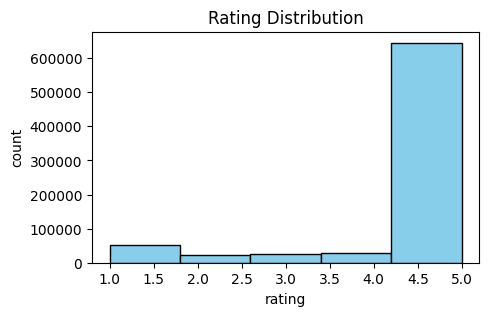

In [20]:
#print rating distribution
data['rating'] = data['rating'].round().astype(int)
data_unique = data.drop_duplicates(subset=['author_id', 'itunes_id'])

plt.figure(figsize=(5,3))
plt.hist(data_unique['rating'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('rating')
plt.ylabel('count')
plt.title('Rating Distribution')
plt.savefig('../results/rating_distribution.png')
plt.show()

In [21]:
rating_counts = data_unique['rating'].value_counts().sort_index()
rating_counts

rating
1     53004
2     22360
3     24908
4     28356
5    645168
Name: count, dtype: int64

### Long-tail Analysis

In [22]:

data_unique = data.drop_duplicates(subset=['author_id', 'itunes_id'])
#find number of unique interactions for users

user_act = data_unique.groupby('author_id').size()

#find number of unique interactions for podcasts
podcast_pop = data_unique.groupby('itunes_id').size()

#printing statistics for user activity
print(f"\nUser Activity (interactions per user):")
print(f"  Mean: {user_act.mean():.1f}")
print(f"  Median: {user_act.median():.1f}")
print(f"  Min: {user_act.min()}")
print(f"  Max: {user_act.max()}")
print(f"  Users with only 1 interaction: {(user_act == 1).sum()},  {(user_act == 1).sum() / len(user_act) * 100:.2f}%")

#printing statistics for podcast popularity
print(f"\nPodcast Popularity (interactions per podcast):")
print(f"  Mean: {podcast_pop.mean():.1f}")
print(f"  Median: {podcast_pop.median():.1f}")
print(f"  Min: {podcast_pop.min()}")
print(f"  Max: {podcast_pop.max()}")
print(f"  Podcasts with only 1 interaction: {(podcast_pop == 1).sum()},  {(podcast_pop == 1).sum() / len(podcast_pop) * 100:.2f}%")


User Activity (interactions per user):
  Mean: 1.2
  Median: 1.0
  Min: 1
  Max: 250
  Users with only 1 interaction: 554642,  86.98%

Podcast Popularity (interactions per podcast):
  Mean: 46.0
  Median: 4.0
  Min: 1
  Max: 31010
  Podcasts with only 1 interaction: 3833,  22.78%


In [31]:

user_top20 = int(len(user_act) * 0.2)
podcast_top20 = int(len(podcast_pop) * 0.2)

#specifying number of contribution of most active users
user_top20_int = user_act.sort_values(ascending=False).head(user_top20).sum() 
total_int = user_act.sum()
user_top20_prc = user_top20_int/total_int*100

#specifying number of contribution of most popular podcasts
podcast_top20_int = podcast_pop.sort_values(ascending=False).head(podcast_top20).sum()
total_int = podcast_pop.sum()
podcast_top20_prc = podcast_top20_int/total_int*100

print(f"Top 20% most active users contribute to {user_top20_prc:.2f}% total interactions.")
print(f"Top 20% most popular podcasts contribute to {podcast_top20_prc:.2f}% total interactions.")

Top 20% most active users contribute to 34.07% total interactions.
Top 20% most popular podcasts contribute to 91.04% total interactions.


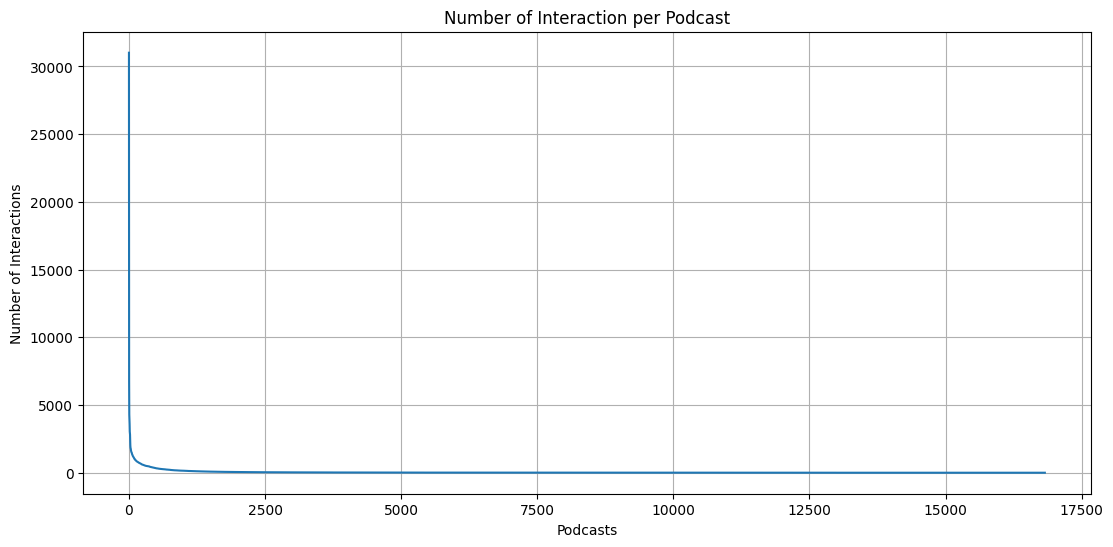

In [24]:
#plotting the interactions per podcast
ordered_pop = podcast_pop.sort_values(ascending= False)

plt.figure(figsize=(13,6))
plt.plot(ordered_pop.values)
plt.title('Number of Interaction per Podcast')
plt.xlabel('Podcasts')
plt.ylabel('Number of Interactions')
plt.grid(True)
plt.savefig('../results/podcast_interaction.png')
plt.show()

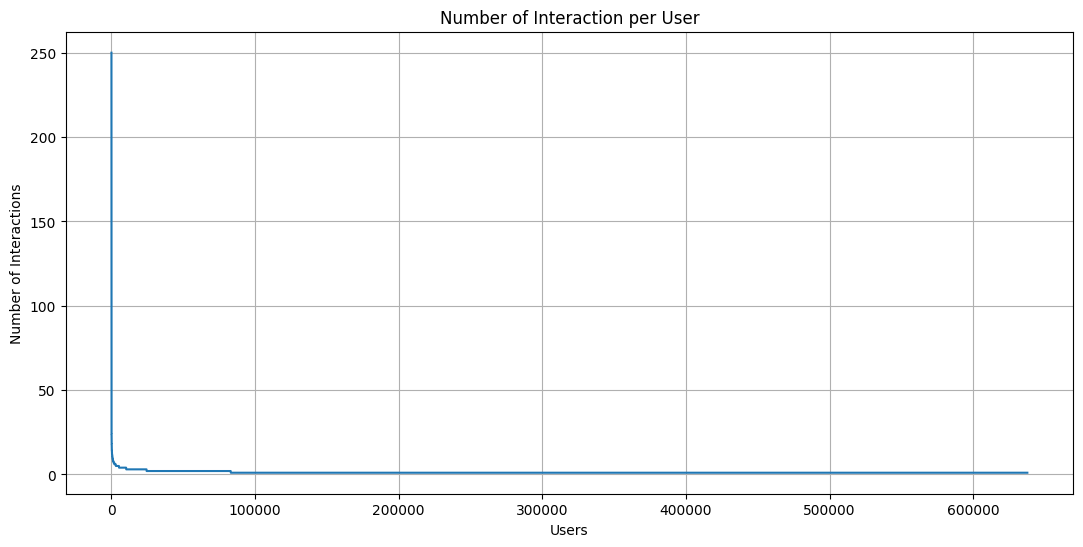

In [25]:
#plotting the interactions per user

ordered_user = user_act.sort_values(ascending= False)

plt.figure(figsize=(13,6))
plt.plot(ordered_user.values)
plt.title('Number of Interaction per User')
plt.xlabel('Users')
plt.ylabel('Number of Interactions')
plt.grid(True)
plt.savefig('../results/user_interaction.png')
plt.show()

### Data Sampling

In [26]:
#finding unique interactions
user_interactions = (
    data[['author_id','itunes_id']]
    .drop_duplicates()
    .groupby('author_id')
    .size()
)

In [27]:
#specifying details about the sample taken to include different types of users
np.random.seed(42)

n_total = 25000
n_cold   = int(0.4 * n_total)
n_low    = int(0.4 * n_total)
n_active = n_total - n_cold - n_low

cold_users   = user_interactions[user_interactions == 1].index
low_users    = user_interactions[(user_interactions >= 2) & (user_interactions <= 4)].index
active_users = user_interactions[user_interactions >= 5].index

#choosing random users in each group
selected_users = np.concatenate([
    np.random.choice(cold_users,   size=min(n_cold, len(cold_users)),   replace=False),
    np.random.choice(low_users,    size=min(n_low, len(low_users)),     replace=False),
    np.random.choice(active_users, size=min(n_active, len(active_users)), replace=False)
])
data = data[data['author_id'].isin(selected_users)].copy()



In [28]:
#making sure correct number of data are being used
user_dist = data[['author_id', 'itunes_id']].drop_duplicates().groupby('author_id').size()
print("Cold:",   (user_dist == 1).sum())
print("Low:",    ((user_dist >= 2) & (user_dist <= 4)).sum())
print("Active:", (user_dist >= 5).sum())

Cold: 10000
Low: 10000
Active: 5000


In [29]:
#printing statistics to ensure requiements for data is met
interactions = data[['author_id', 'itunes_id']].drop_duplicates()

unique_users = interactions['author_id'].nunique()
unique_podcasts = interactions['itunes_id'].nunique()
num_interactions = len(interactions)

sparsity  = 1 - (num_interactions / (unique_users * unique_podcasts))
sparsity *= 100
print(f'Unique users: {unique_users}, Unique podcasts: {unique_podcasts}')
print(f'Total interactions: {num_interactions}')
print(f'Sparsity: {sparsity:.4f} %')


Unique users: 25000, Unique podcasts: 7206
Total interactions: 70886
Sparsity: 99.9607 %


### Data Saving

In [30]:
#saving data
data.to_csv('../data/preprocessed_data.csv', index=False)